In [1]:
import pandas as pd
!pip install openpyxl
!pip install seaborn
import seaborn as sns
sns.set()

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
  Using cached seaborn-0.12.0-py3-none-any.whl (285 kB)


In [2]:
data = pd.read_excel('small_news.xlsx', index_col = 0)

In [3]:
data.iloc[0]

date                                               2018-06-26
headline    Former Penn State worker, 54, is charged with ...
source                                             Daily Mail
section                                                  news
valence                                              0.571889
arousal                                              0.550033
Name: 0, dtype: object

In [4]:
data = data[['date', 'headline', 'source', 'section', 'valence', 'arousal']]

In [5]:
data

,date,headline,source,section,valence,arousal
0,2018-06-26,"Former Penn State worker, 54, is charged with ...",Daily Mail,news,0.571889,0.550033
1,2020-03-26,"Heartwarming moment grandfather, 87, leaves ho...",Daily Mail,news,0.595688,0.502242
2,2018-11-20,Liberals to vote on EXPELLING Malcolm Turnbull...,Daily Mail,news,0.581386,0.629200
3,2017-03-26,'There is only one Lionel Messi': Gerard Deulo...,Daily Mail,sport,0.675016,0.568503
4,2018-03-26,Cynthia Nixon slams New York's film industry t...,Daily Mail,news,0.619478,0.572059
...,...,...,...,...,...,...
249995,2019-11-05,Strictly Christmas Special: Gemma Atkinson wil...,Daily Mail,tvshowbiz,0.652681,0.506631
249996,2018-10-04,Titans cast stun at NYC premiere as it's annou...,Daily Mail,tvshowbiz,0.646417,0.536878
249997,2019-08-23,India seeks to kickstart sagging economy,Daily Mail,wires,0.543808,0.427101
249998,2019-03-12,Parents of 44 children who have not been vacci...,Daily Mail,news,0.503181,0.547943


In [6]:
data['source'].value_counts()

Daily Mail          227425
Express              12878
Guardian              6510
Evening Standard      2076
Independent            968
iNews                  143
Name: source, dtype: int64

<AxesSubplot: xlabel='source', ylabel='arousal'>

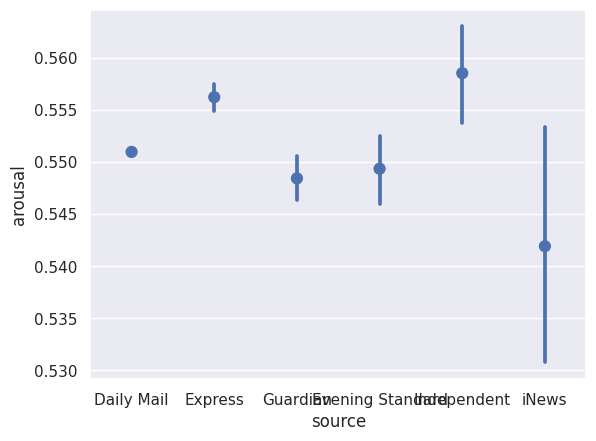

In [7]:
sns.pointplot(x = 'source', y = 'arousal', data = data, join = False)

In [8]:
import matplotlib.pyplot as plt
## note: if you get an error in this cell, may need to run "!pip install matplotlib" first

In [9]:
sns.pointplot(x = 'source', y = 'arousal', data = news)
plt.xticks(rotation = 45)

NameError: name 'news' is not defined

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Daily Mail'),
  Text(1, 0, 'Express'),
  Text(2, 0, 'Guardian'),
  Text(3, 0, 'Evening Standard'),
  Text(4, 0, 'Independent'),
  Text(5, 0, 'iNews')])

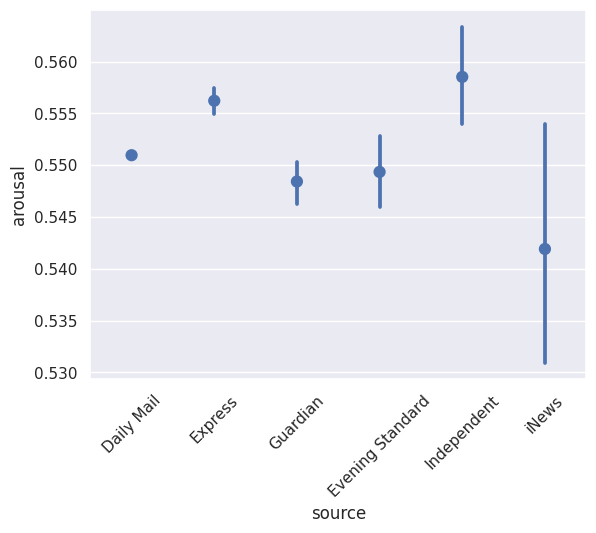

In [10]:
h = sns.pointplot(x = 'source', y = 'arousal', join = False, data = data)
plt.xticks(rotation = 45)

In [11]:
plt.tight_layout()
h.get_figure().savefig('charts.png', dpi = 300)


<Figure size 640x480 with 0 Axes>

In [12]:
immi = []

for i in data['headline']:
    if 'immig' in i.lower():
        immi.append('mentions immigration')
    else:
        immi.append("doesn't mention immigration")
        
data['immigration'] = immi

In [13]:
data.columns


Index(['date', 'headline', 'source', 'section', 'valence', 'arousal',
       'immigration'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Daily Mail'),
  Text(1, 0, 'Express'),
  Text(2, 0, 'Guardian'),
  Text(3, 0, 'Evening Standard'),
  Text(4, 0, 'Independent'),
  Text(5, 0, 'iNews')])

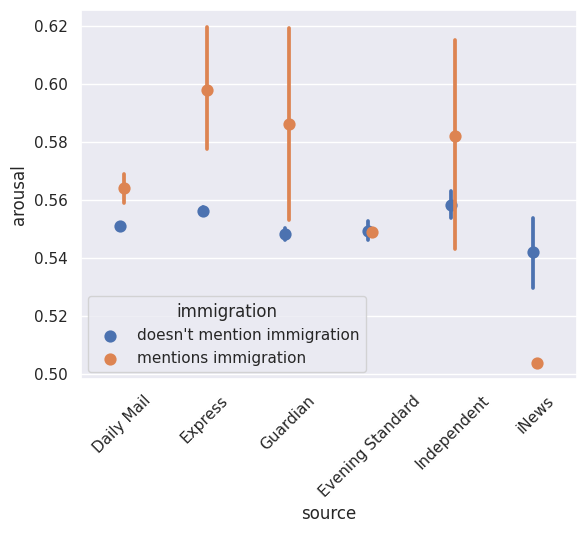

In [74]:
sns.pointplot(x = 'source', y= 'arousal', hue = 'immigration', dodge = True, join = False, data = data)
plt.xticks(rotation = 45)

In [75]:
immig = data[data['immigration'] == "mentions immigration"]
not_immig = data[data['immigration'] == "doesn't mention immigration"]
